In [49]:
#
# Import relevant Libraries
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [50]:
from keras.datasets import mnist

In [51]:
from keras.layers import Input, Dense
from keras.models import Model

In [52]:

# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
(x_train,_),(x_test,_) = mnist.load_data()

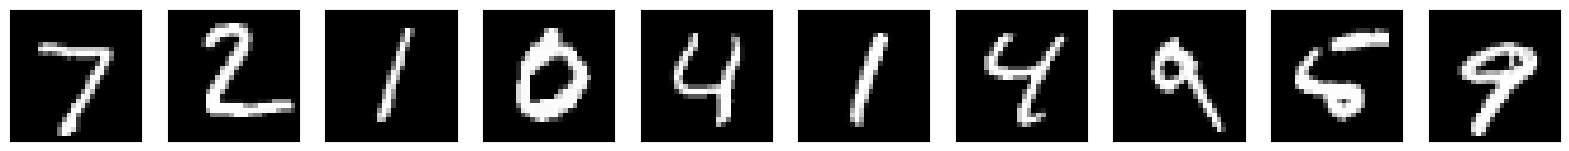

In [53]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [54]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255
x_train = x_train/255
x_test  = x_test/255

In [55]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [56]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choise
#
#
encoder.add(Dense(500, activation='sigmoid'))
encoder.add(Dense(400, activation='tanh'))
encoder.add(Dense(350, activation='sigmoid'))
encoder.add(Dense(40, activation='relu'))
encoder.add(Dense(25, activation='tanh'))

# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#

In [57]:
# print the encoder model
encoder.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 500)               392500    
                                                                 
 dense_46 (Dense)            (None, 400)               200400    
                                                                 
 dense_47 (Dense)            (None, 350)               140350    
                                                                 
 dense_48 (Dense)            (None, 40)                14040     
                                                                 
 dense_49 (Dense)            (None, 25)                1025      
                                                                 
Total params: 748315 (2.85 MB)
Trainable params: 7483

In [58]:
from keras.layers import Reshape

In [59]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(350, activation='tanh'))
decoder.add(Dense(500, activation='sigmoid'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [60]:
# print the decoder model
decoder.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 50)                1300      
                                                                 
 dense_51 (Dense)            (None, 100)               5100      
                                                                 
 dense_52 (Dense)            (None, 350)               35350     
                                                                 
 dense_53 (Dense)            (None, 500)               175500    
                                                                 
 dense_54 (Dense)            (None, 784)               392784    
                                                                 
 reshape_5 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 610034 (2.33 MB)
Trainable params: 6100

In [61]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [62]:
# print the autoencoder model
autoencoder.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_12 (Sequential)  (None, 25)                748315    
                                                                 
 sequential_13 (Sequential)  (None, 28, 28)            610034    
                                                                 
Total params: 1358349 (5.18 MB)
Trainable params: 1358349 (5.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [64]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
history = autoencoder.fit( x_train, x_train,
                # the number of times of training using the whole dataset
                    epochs=15,
                    
                    validation_data =(x_test,x_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1)
                    
                # early stopping    
                    #callbacks=[early_stop] )

Epoch 1/15
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2659 - accuracy: 0.0672 - val_loss: 0.2636 - val_accuracy: 0.0678
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2636 - accuracy: 0.0675 - val_loss: 0.2633 - val_accuracy: 0.0639
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2450 - accuracy: 0.0826 - val_loss: 0.2365 - val_accuracy: 0.0953
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2329 - accuracy: 0.0959 - val_loss: 0.2244 - val_accuracy: 0.1037
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2154 - accuracy: 0.1186 - val_loss: 0.2045 - val_accuracy: 0.1371
Epoch 6/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1990 - accuracy: 0.1461 - val_loss: 0.1930 - val_accuracy: 0.1572
Epoch 7/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1904 - accuracy: 0.1626 - val_loss: 0.1863 - val_ac

In [65]:
x_test[i]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

313/313 [==============================] - 1s 3ms/step


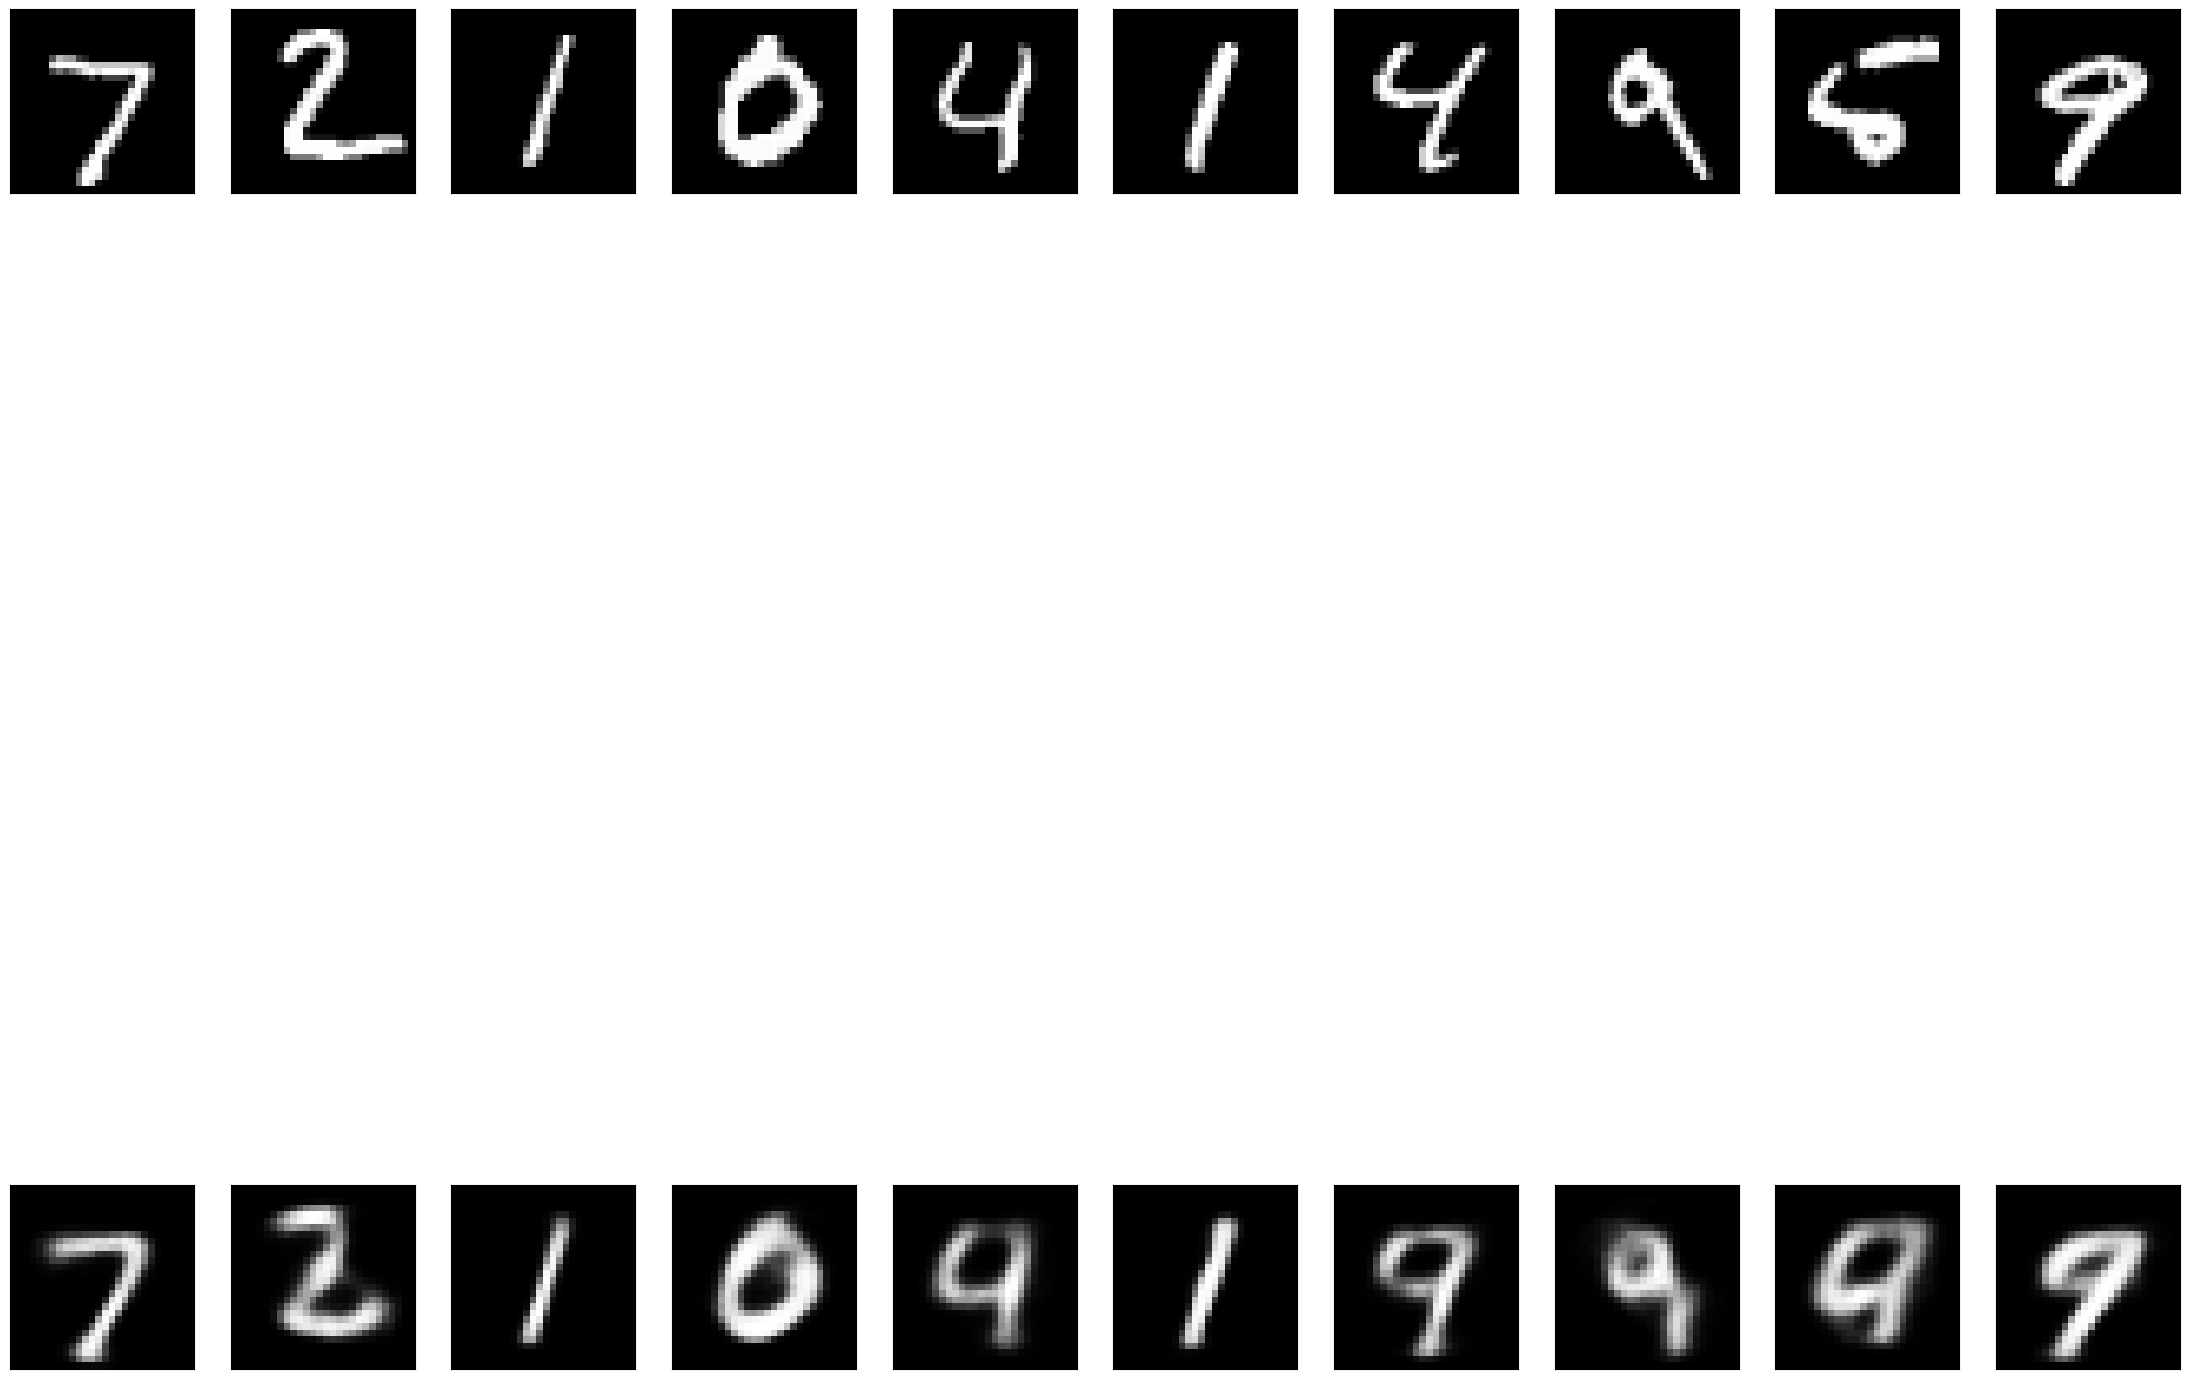

In [66]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 10

plt.figure(figsize=(28, 28))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    #
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
plt.show()

In [67]:
from tensorflow.keras.layers import GaussianNoise

In [68]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

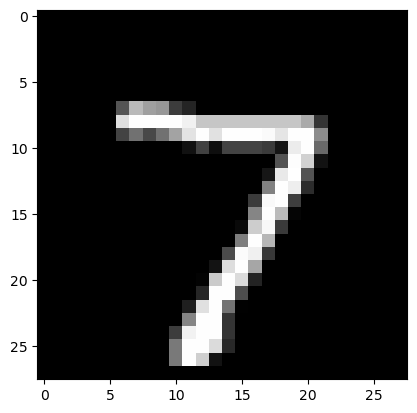

In [69]:
plt.imshow(x_test[0])

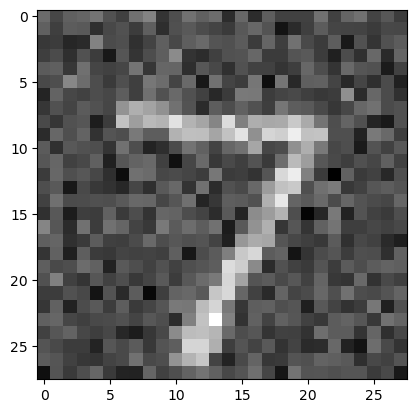

In [70]:
plt.imshow(noisey[0])

In [71]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
#
encoder.add(Dense(500, activation='sigmoid'))
encoder.add(Dense(400, activation='tanh'))
encoder.add(Dense(350, activation='sigmoid'))
encoder.add(Dense(40, activation='relu'))
encoder.add(Dense(25, activation='tanh'))




In [72]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
#
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(350, activation='tanh'))
decoder.add(Dense(500, activation='sigmoid'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [73]:
noise_remover = Sequential([encoder, decoder])

In [74]:
# Compile the network as earlier
noise_remover.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [75]:
# Fit the network as earlier.
history2 = noise_remover.fit( x_train, x_train,
                # the number of times of training using the whole dataset
                    epochs=15,
                    
                    validation_data =(x_test,x_test),
                    
                # Boolean (whether to shuffle the training data before each epoch)
                    shuffle = True,
                
                # 1 = progress bar printing
                    verbose = 1)
                    
                # early stopping    
                    #callbacks=[early_stop] )

Epoch 1/15
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2659 - accuracy: 0.0671 - val_loss: 0.2635 - val_accuracy: 0.0659
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2567 - accuracy: 0.0716 - val_loss: 0.2411 - val_accuracy: 0.0869
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2379 - accuracy: 0.0920 - val_loss: 0.2318 - val_accuracy: 0.1041
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2217 - accuracy: 0.1082 - val_loss: 0.2099 - val_accuracy: 0.1278
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2031 - accuracy: 0.1399 - val_loss: 0.1963 - val_accuracy: 0.1551
Epoch 6/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1935 - accuracy: 0.1592 - val_loss: 0.1887 - val_accuracy: 0.1637
Epoch 7/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1869 - accuracy: 0.1675 - val_loss: 0.1805 - val_ac

In [76]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


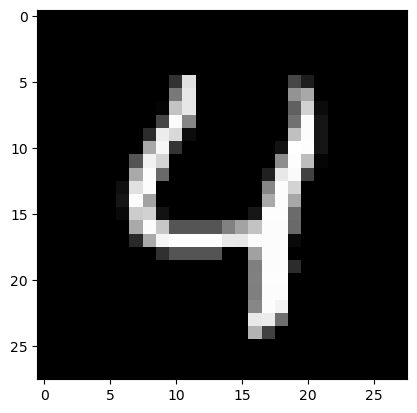

The Noisey Version


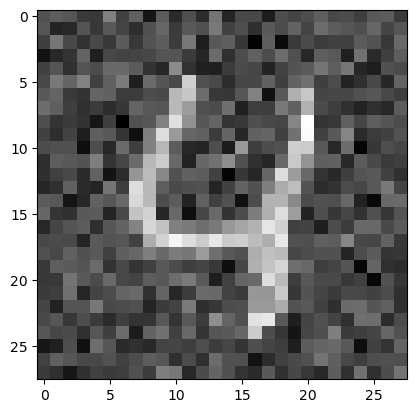

After going through denoiser


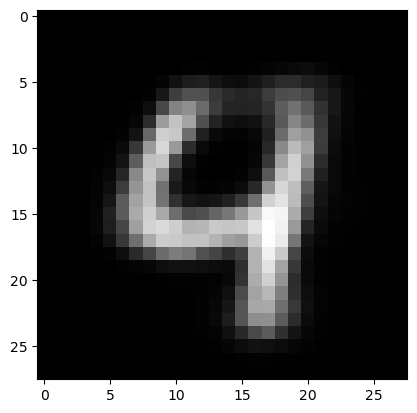

In [77]:
n = 4
print("The Original")
plt.imshow(x_test[n])
plt.show()


print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()


print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()

In [78]:
noise_remover.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_15 (Sequential)  (None, 25)                748315    
                                                                 
 sequential_16 (Sequential)  (None, 28, 28)            610034    
                                                                 
Total params: 1358349 (5.18 MB)
Trainable params: 1358349 (5.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
